In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc, precision_score,recall_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re #Regular Expressions
import string #importing string functions
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.porter import PorterStemmer

In [ ]:
dff= pd.read_csv('Fake.csv')
dff.head()

In [4]:
dft= pd.read_csv('True.csv')
dft.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
dff["target"] = 0
dft["target"] = 1

In [6]:
df_merge = pd.concat([dff, dft], axis =0 )
df_merge.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [7]:
df_merge.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [8]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

In [9]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

<Axes: ylabel='target'>

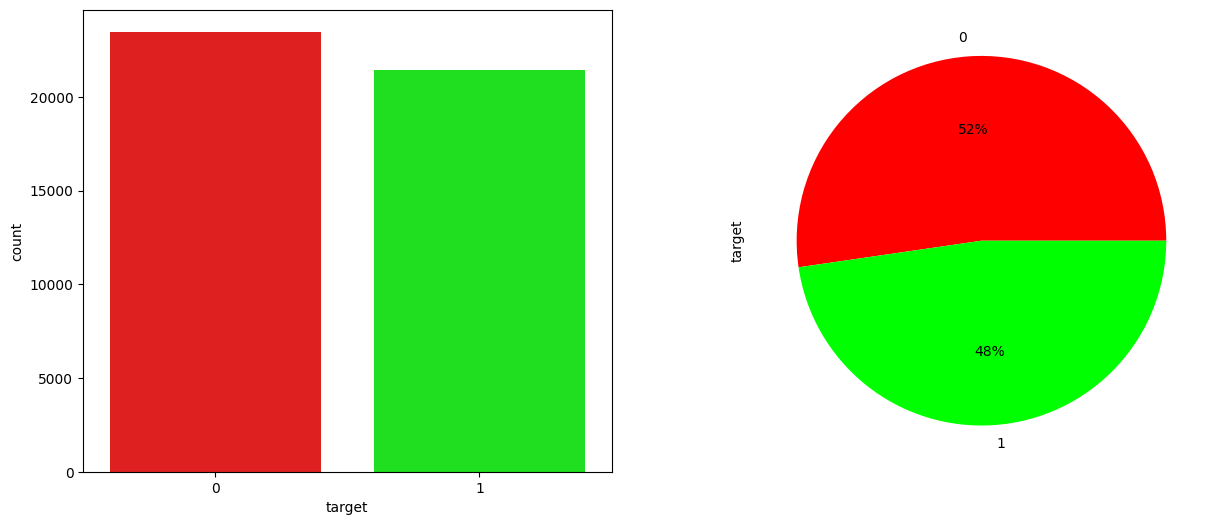

In [10]:
plt.figure(figsize = (15, 6))
custom_colors = ["#FF0000", "#00FF00"]
plt.subplot(1, 2, 1)
sns.countplot(x=df['target'],palette=custom_colors)
plt.subplot(1, 2, 2)
df['target'].value_counts().plot.pie(autopct='%1.0f%%',colors=custom_colors)

In [11]:
df = df.sample(frac = 1)

In [12]:
df

,text,target
9499,A CHECK AND BALANCE BETWEEN THE MILITARY AND T...,0
13548,NEW YORK (Reuters) - Venezuela s government ha...,1
6352,LONDON (Reuters) - The chairman of a U.S. cong...,1
8468,A strange answer offered by Governor Chris Chr...,0
3293,WASHINGTON (Reuters) - U.S. President Donald T...,1
...,...,...
22023,21st Century Wire says With the ongoing hyster...,0
3829,While they are sad and in understandable despa...,0
14066,Hillary s over-the-top plan to tax the consume...,0
4470,"QAYYARA WEST AIRFIELD, Iraq (Reuters) - Presid...",1


In [13]:
!pip install cleantext


In [14]:
!pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.1 MB/s eta 0:00:00


In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from cleantext import clean
import emoji
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r"[^\w\s]", "", text) # remove punctuation
    text = re.sub(r"\s+", " ", text) # remove extra spaces
    text = text.replace("dont", "do not") # expand contraction
    text = text.replace("youre", "you are") # expand contraction
    text = emoji.demojize(text)

# This is a text with emoji

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in tokens]


    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in stems]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(lem)

    return preprocessed_text

In [17]:
df["text"] = df["text"].apply(preprocess_text)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['text'],
                                                    df['target'],
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(x_train.shape[0]))
print('Number of rows in the test set: {}'.format(x_test.shape[0]))

Number of rows in the total set: 44898
Number of rows in the training set: 33673
Number of rows in the test set: 11225


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x1_train = vectorization.fit_transform(x_train)
x1_test = vectorization.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x1_train,y_train)

LogisticRegression()

In [21]:
y_train_pred1 = LR.predict(x1_train)
y_test_pred1 = LR.predict(x1_test)
print('Accuracy of train data: ', metrics.accuracy_score(y_train, y_train_pred1))
print('Accuracy of test data: ', metrics.accuracy_score(y_test, y_test_pred1))

Accuracy of train data:  0.9907344162979241
Accuracy of test data:  0.9843207126948775


Confusion Matrix: 
Accuracy score:  0.9843207126948775
Precision score:  0.9823269513991163
Recall score:  0.9852289512555391
F1 score:  0.9837758112094395


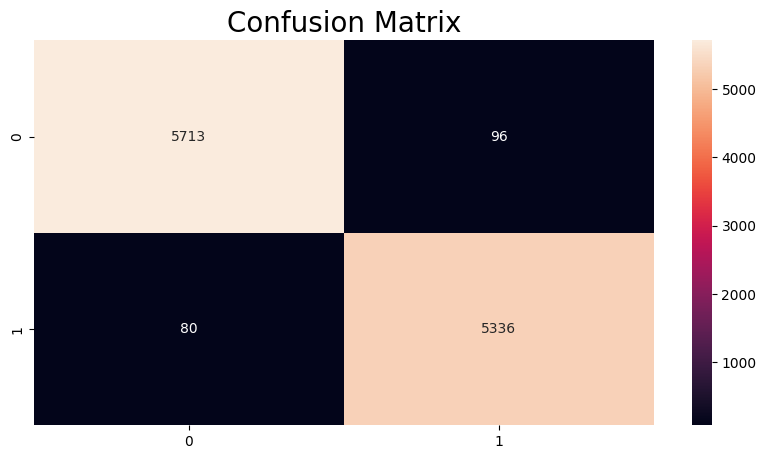

In [22]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred1), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)
print('Accuracy score: ', format(accuracy_score(y_test, y_test_pred1)))
print('Precision score: ', format(precision_score(y_test, y_test_pred1)))
print('Recall score: ', format(recall_score(y_test, y_test_pred1)))
print('F1 score: ', format(f1_score(y_test, y_test_pred1)))

In [23]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5809
           1       0.98      0.99      0.98      5416

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [24]:
decision_tree_dt = DecisionTreeClassifier(random_state=50)
decision_tree_dt.fit(x1_train,y_train)

DecisionTreeClassifier(random_state=50)

In [25]:
y_train_pred2 = decision_tree_dt.predict(x1_train)
y_test_pred2 = decision_tree_dt.predict(x1_test)
print('Accuracy of train data: ', metrics.accuracy_score(y_train, y_train_pred2))
print('Accuracy of test data: ', metrics.accuracy_score(y_test, y_test_pred2))

Accuracy of train data:  0.9999703026163395
Accuracy of test data:  0.9961692650334075


Confusion Matrix: 
Accuracy score:  0.9961692650334075
Precision score:  0.9968559275013871
Recall score:  0.9951994091580503
F1 score:  0.996026979580523


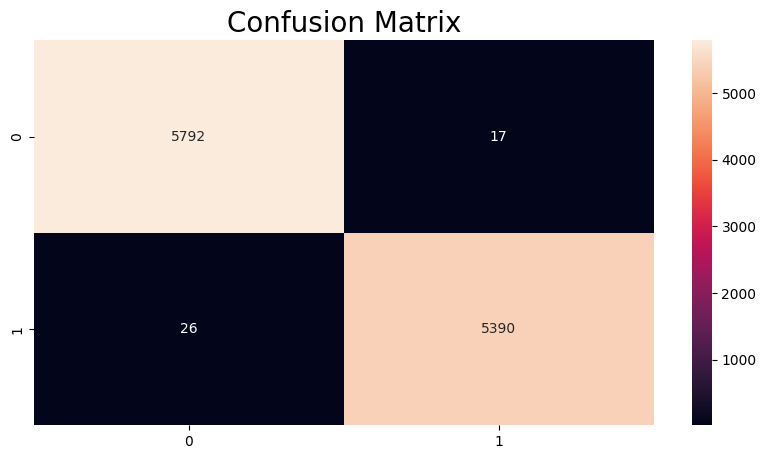

In [26]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred2), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)
print('Accuracy score: ', format(accuracy_score(y_test, y_test_pred2)))
print('Precision score: ', format(precision_score(y_test, y_test_pred2)))
print('Recall score: ', format(recall_score(y_test, y_test_pred2)))
print('F1 score: ', format(f1_score(y_test, y_test_pred2)))

In [27]:
Random_Forest=RandomForestClassifier(random_state=50)
Random_Forest.fit(x1_train,y_train)

RandomForestClassifier(random_state=50)

In [28]:
y_train_pred3 = Random_Forest.predict(x1_train)
y_test_pred3 = Random_Forest.predict(x1_test)
print('Accuracy on train data: ', metrics.accuracy_score(y_train, y_train_pred3))
print("Random Forest test Accuracy:", metrics.accuracy_score(y_test, y_test_pred3))

Accuracy on train data:  0.9999703026163395
Random Forest test Accuracy: 0.9920712694877506


Confusion Matrix: 
Accuracy score:  0.9920712694877506
Precision score:  0.9911488106214272
Recall score:  0.9924298375184638
F1 score:  0.99178891041609


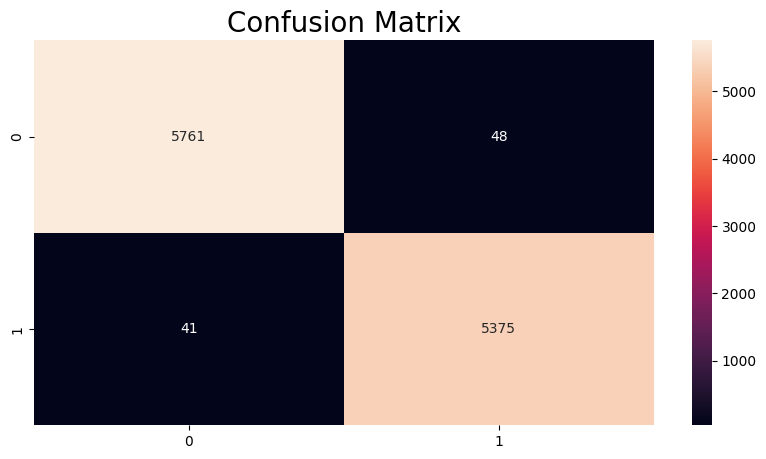

In [29]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred3), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)
print('Accuracy score: ', format(accuracy_score(y_test, y_test_pred3)))
print('Precision score: ', format(precision_score(y_test, y_test_pred3)))
print('Recall score: ', format(recall_score(y_test, y_test_pred3)))
print('F1 score: ', format(f1_score(y_test, y_test_pred3)))

In [30]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(x1_train.toarray(), y_train)

MultinomialNB()

In [31]:
y_train_pred4 = naive_bayes.predict(x1_train)
y_test_pred4 = naive_bayes.predict(x1_test)
print('Accuracy on train data: ', metrics.accuracy_score(y_train, y_train_pred4))
print("Random Forest test Accuracy:", metrics.accuracy_score(y_test, y_test_pred4))

Accuracy on train data:  0.9401597719240935
Random Forest test Accuracy: 0.9334521158129176


Confusion Matrix: 
Accuracy score:  0.9334521158129176
Precision score:  0.941387785970883
Recall score:  0.9193131462333826
F1 score:  0.9302195235871089


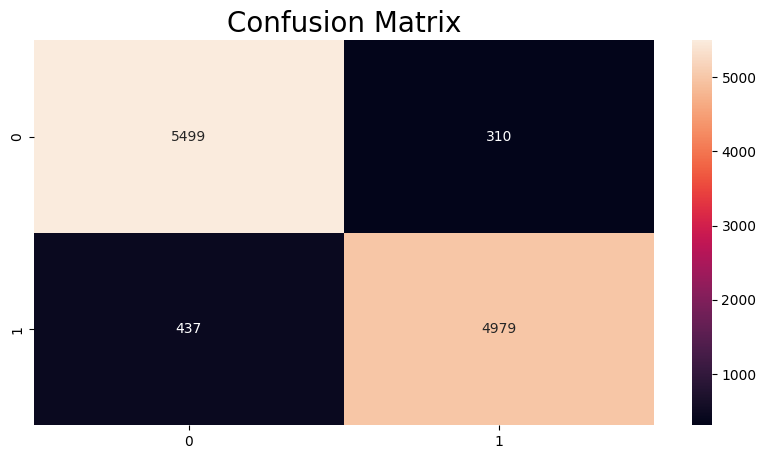

In [32]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred4), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)
print('Accuracy score: ', format(accuracy_score(y_test, y_test_pred4)))
print('Precision score: ', format(precision_score(y_test, y_test_pred4)))
print('Recall score: ', format(recall_score(y_test, y_test_pred4)))
print('F1 score: ', format(f1_score(y_test, y_test_pred4)))

In [33]:
def output(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

In [37]:
def testing(news):
    testing_news = {"text":[news]}
    new = pd.DataFrame(testing_news)
    new["text"] = new["text"].apply(preprocess_text)
    new_x_test = new["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = decision_tree_dt.predict(new_xv_test)
    pred_RFC =Random_Forest.predict(new_xv_test)
    pred_NV=naive_bayes.predict(new_xv_test)
    pred=[pred_LR,pred_DT,pred_RFC,pred_NV]
    print( "LR: ", output(pred_LR), '\n', "pred_DT: ", output(pred_DT), '\n', "pred_RFC: ", output(pred_RFC), '\n', "pred_NV: ", output(pred_NV), '\n' )

In [38]:
news='SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of steady growth triggered by a flurry of massive government contracts, OAS was ensnared in Operation Car Wash which unearthed an illegal contracting ring between state firms and builders. The ensuing scandal helped topple former Brazilian President Dilma Rousseff last year. Trained as an engineer, Mata Pires founded OAS with two colleagues in 1976 to do sub-contracting work for larger rival Odebrecht SA - the biggest of the builders involved in the probe.  Before the scandal, Forbes magazine estimated Mata Pires  fortune at $1.6 billion. He dropped off the magazine s billionaire list in 2015, months after OAS sought bankruptcy protection after the Car Wash scandal. While Mata Pires was never accused of wrongdoing in the investigations, creditors demanded he and his family stay away from the builder s day-to-day operations, people directly involved in the negotiations told Reuters at the time. He is survived by his wife and his two sons. '

In [39]:
news=testing(news)

LR:  Not A Fake News 
 pred_DT:  Not A Fake News 
 pred_RFC:  Not A Fake News 
 pred_NV:  Not A Fake News 

